In [1]:
import pandas as pd # data manipulation
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil, floor 

In [157]:
df = pd.read_csv('WA_Fn-UseC_-Sales-Win-Loss.csv')
df.head()

,Index,Opportunity Number,Supplies Subgroup,Supplies Group,Region,Route To Market,Elapsed Days In Sales Stage,Sales Stage Change Count,Opportunity Result,Total Days Identified Through Closing,Total Days Identified Through Qualified,Opportunity Amount USD,Client Size By Revenue,Client Size By Employee Count,Revenue From Client Past Two Years,Competitor Type,Ratio Days Identified To Total Days,Ratio Days Validated To Total Days,Ratio Days Qualified To Total Days,Deal Size Category
0,1,1641984,Exterior Accessories,Car Accessories,Northwest,Fields Sales,76,13,Won,104,101,0,5,5,0,Unknown,0.69636,0.113985,0.154215,1
1,2,1658010,Exterior Accessories,Car Accessories,Pacific,Reseller,63,2,Loss,163,163,0,3,5,0,Unknown,0.00000,1.000000,0.000000,1
2,3,1674737,Motorcycle Parts,Performance & Non-auto,Pacific,Reseller,24,7,Won,82,82,7750,1,1,0,Unknown,1.00000,0.000000,0.000000,1
3,4,1675224,Shelters & RV,Performance & Non-auto,Midwest,Reseller,16,5,Loss,124,124,0,1,1,0,Known,1.00000,0.000000,0.000000,1
4,5,1689785,Exterior Accessories,Car Accessories,Pacific,Reseller,69,11,Loss,91,13,69756,1,1,0,Unknown,0.00000,0.141125,0.000000,4


In [3]:
# Defining function to set figure size
def figure(a,b):
    sns.set(rc={'figure.figsize':(a,b)})

## Categorical Variables

### Display

In [4]:
df_string = df.loc[:,df.dtypes == 'object']
df_string.head()

,Supplies Subgroup,Supplies Group,Region,Route To Market,Opportunity Result,Competitor Type
0,Exterior Accessories,Car Accessories,Northwest,Fields Sales,Won,Unknown
1,Exterior Accessories,Car Accessories,Pacific,Reseller,Loss,Unknown
2,Motorcycle Parts,Performance & Non-auto,Pacific,Reseller,Won,Unknown
3,Shelters & RV,Performance & Non-auto,Midwest,Reseller,Loss,Known
4,Exterior Accessories,Car Accessories,Pacific,Reseller,Loss,Unknown


### Display

In [162]:
print(df_string.columns.tolist())

['Supplies Subgroup', 'Supplies Group', 'Region', 'Route To Market', 'Opportunity Result', 'Competitor Type']


### Display

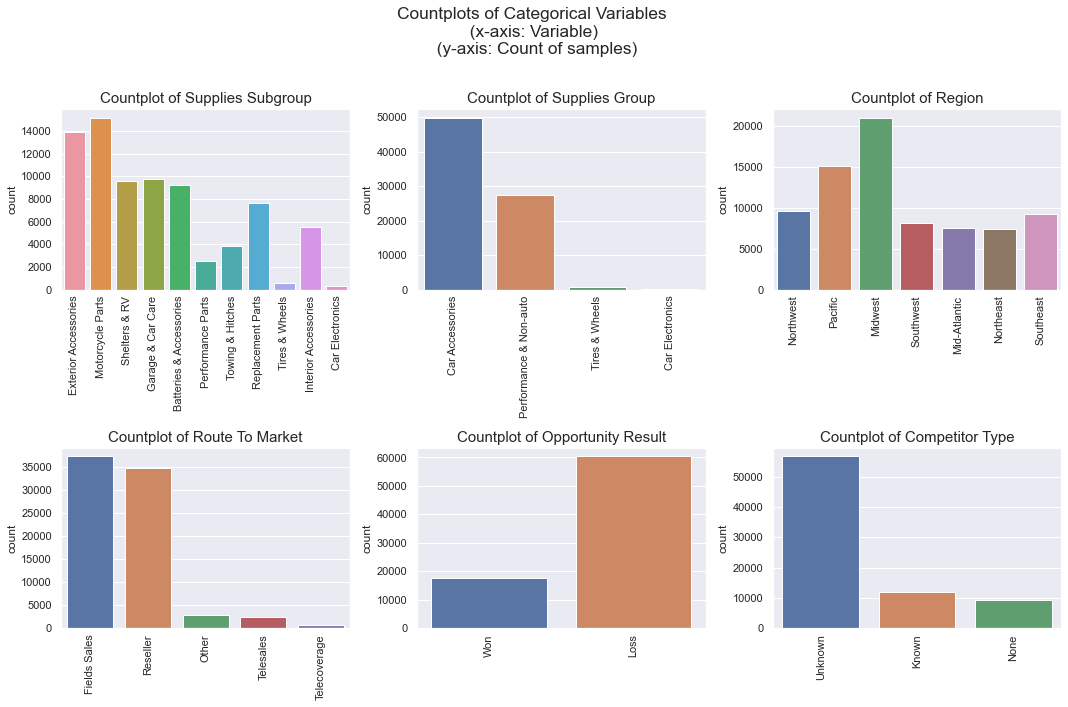

In [173]:
figure(15,10)

plt_cols = 3                                                           # Customized no. of columns in subplot
plt_rows = ceil(len(df_string.columns)/plt_cols)                       # Set the no. of rows in subplot by dividing: 
                                                                       #  roundup(no. of variables / no. of columns)
    
fig, axes = plt.subplots(plt_rows,plt_cols)
fig.suptitle("Countplots of Categorical Variables \n (x-axis: Variable) \n (y-axis: Count of samples)", 
             fontsize="x-large")
axes = axes.ravel()

for i in range(0, len(df_string.columns)):
    sns.countplot(df_string.iloc[:,i], ax=axes[i])                     # Plot countplot for each categorical variable
    axes[i].set_title('Countplot of ' + df_string.columns[i], size=15) # Set title of every subplot
    axes[i].tick_params(axis='x', labelrotation=90, pad=0)             # Rotate x-axis of every subplot
    axes[i].set_xlabel('')                                             # Turn off subplots' x-axis titles for tidiness
fig.tight_layout(rect=[0, 0, 1, 0.88])                                 # Adjust tight_layout to accommodate suptitle


## Numerical variables

### Display

In [206]:
df_numeric0 = df.loc[:, df.dtypes!='object']
df_numeric0.head()

,Index,Opportunity Number,Elapsed Days In Sales Stage,Sales Stage Change Count,Total Days Identified Through Closing,Total Days Identified Through Qualified,Opportunity Amount USD,Client Size By Revenue,Client Size By Employee Count,Revenue From Client Past Two Years,Ratio Days Identified To Total Days,Ratio Days Validated To Total Days,Ratio Days Qualified To Total Days,Deal Size Category
0,1,1641984,76,13,104,101,0,5,5,0,0.69636,0.113985,0.154215,1
1,2,1658010,63,2,163,163,0,3,5,0,0.00000,1.000000,0.000000,1
2,3,1674737,24,7,82,82,7750,1,1,0,1.00000,0.000000,0.000000,1
3,4,1675224,16,5,124,124,0,1,1,0,1.00000,0.000000,0.000000,1
4,5,1689785,69,11,91,13,69756,1,1,0,0.00000,0.141125,0.000000,4


In [207]:
df_numeric0 = df.loc[:, df.dtypes!='object']

# Check presence of Index / index 
#  and drop those columns
id_cols = ['Index', 'index']
df_numeric = df_numeric0.loc[:, ~df_numeric0.columns.isin(id_cols)]
    
df_numeric.head()

,Opportunity Number,Elapsed Days In Sales Stage,Sales Stage Change Count,Total Days Identified Through Closing,Total Days Identified Through Qualified,Opportunity Amount USD,Client Size By Revenue,Client Size By Employee Count,Revenue From Client Past Two Years,Ratio Days Identified To Total Days,Ratio Days Validated To Total Days,Ratio Days Qualified To Total Days,Deal Size Category
0,1641984,76,13,104,101,0,5,5,0,0.69636,0.113985,0.154215,1
1,1658010,63,2,163,163,0,3,5,0,0.00000,1.000000,0.000000,1
2,1674737,24,7,82,82,7750,1,1,0,1.00000,0.000000,0.000000,1
3,1675224,16,5,124,124,0,1,1,0,1.00000,0.000000,0.000000,1
4,1689785,69,11,91,13,69756,1,1,0,0.00000,0.141125,0.000000,4


In [161]:
# Check presence of Index / index 
#  columns to be removed
id_col = ['Index', 'index']

for i in df_numeric.columns:
    if i in id_col:
        df_numeric = df_numeric.drop(labels='Index',axis=1)
    print(i)

Opportunity Number
Elapsed Days In Sales Stage
Sales Stage Change Count
Total Days Identified Through Closing
Total Days Identified Through Qualified
Opportunity Amount USD
Client Size By Revenue
Client Size By Employee Count
Revenue From Client Past Two Years
Ratio Days Identified To Total Days
Ratio Days Validated To Total Days
Ratio Days Qualified To Total Days
Deal Size Category


C:\Users\atiqah.razmi\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\atiqah.razmi\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\atiqah.razmi\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


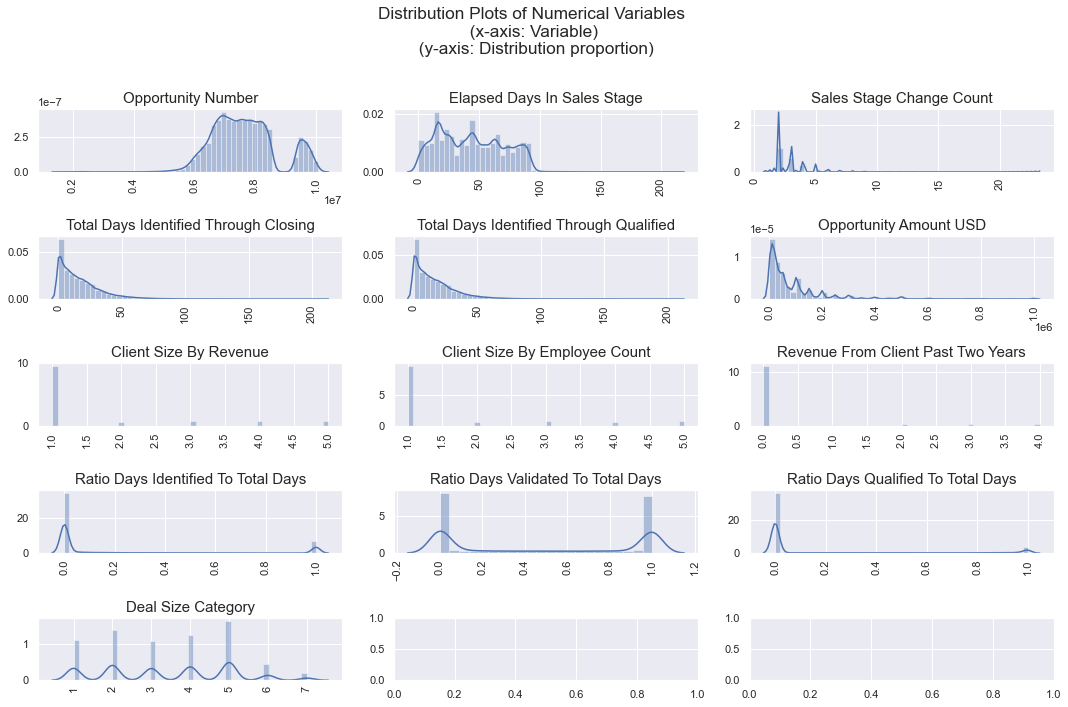

In [174]:
figure(15,10)

plt_cols = 3                                                           # Customized no. of columns in subplot
plt_rows = ceil(len(df_numeric.columns)/plt_cols)                       # Set the no. of rows in subplot by dividing: 
                                                                       #  roundup(no. of variables / no. of columns)
    
fig, axes = plt.subplots(plt_rows,plt_cols)
fig.suptitle("Distribution Plots of Numerical Variables \n (x-axis: Variable) \n (y-axis: Distribution proportion)", 
             fontsize="x-large")

axes = axes.ravel()

for i in range(0, len(df_numeric.columns)):
    sns.distplot(df_numeric.iloc[:,i], ax=axes[i])                     # Plot countplot for each categorical variable
    axes[i].set_title(df_numeric.columns[i], size=15) # Set title of every subplot
    axes[i].tick_params(axis='x', labelrotation=90, pad=0)             # Rotate x-axis of every subplot
    axes[i].set_xlabel('')                                             # Turn off subplots' x-axis titles for tidiness
fig.tight_layout(rect=[0, 0, 1, 0.88])                                 # Adjust tight_layout to accommodate suptitle

In [70]:
# fig, axs = plt.subplots(2,5, figsize=(15, 6), facecolor='w', edgecolor='k')
# fig.subplots_adjust(hspace = .5, wspace=.001)

# axs = axs.ravel()

# for i in range(10):
#     axs[i].contourf(np.random.rand(10,10),5,cmap=plt.cm.Oranges)
#     axs[i].set_title(str(250+i))

In [ ]:
## **************************************** ##

## Original Code

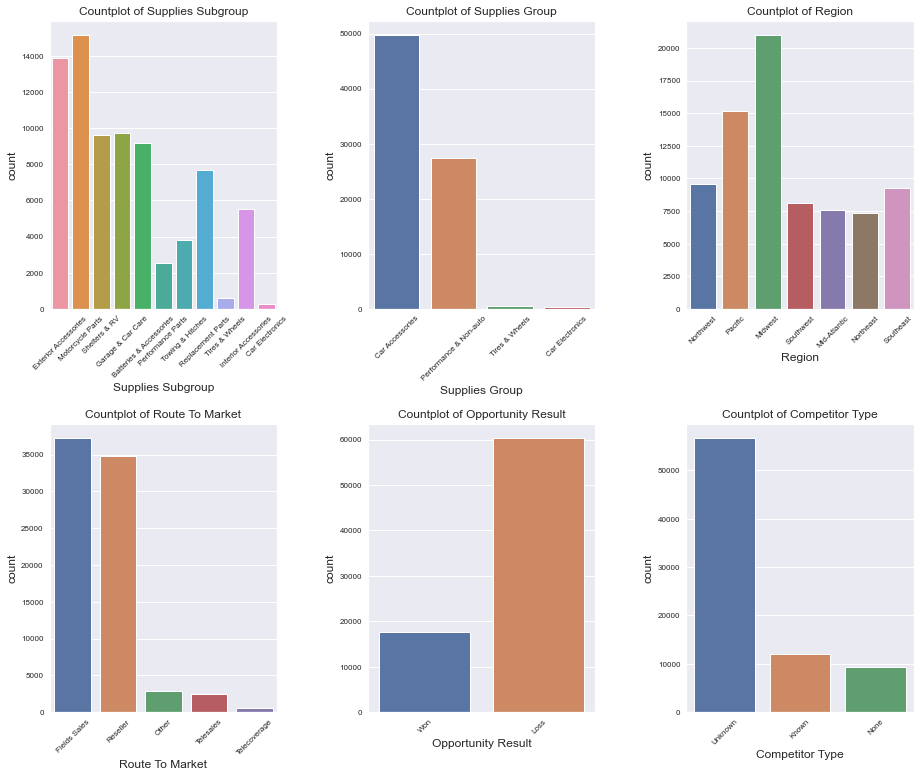

In [144]:
figure(15,8)

plt_cols = 3 # set the no. of columns in subplot
# set the no. of rows in subplot by dividing no. of cols and round up
plt_rows = ceil((len(df_string.columns)+1)/plt_cols)  

i=0
for i in range(0, len(df_string.columns), 1):
    plt.subplot(plt_rows,plt_cols,i+1)
    sns.countplot(df_string.iloc[:,i])
    plt.title('Countplot of ' + df_string.columns[i])
    plt.xticks(rotation=45)
    plt.subplots_adjust(bottom=0.01)
    plt.tick_params(labelsize=8, pad=0)
    plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=2, 
                    wspace=0.4, 
                    hspace=0.4)
    i += 1

In [131]:
plt.show()

C:\Users\atiqah.razmi\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\atiqah.razmi\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\atiqah.razmi\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


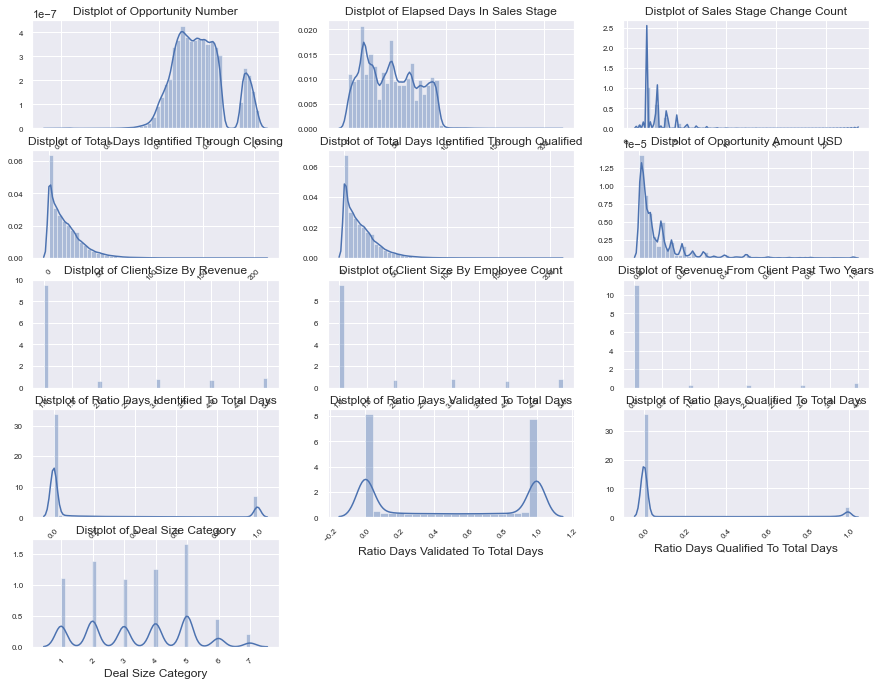

In [126]:
figure(15,10)

plt_cols = 3 # set the no. of columns in subplot
# set the no. of rows in subplot by dividing no. of cols and round up
plt_rows = ceil((len(df_numeric.columns)+1)/plt_cols)  

i=0
for i in range(0, len(df_numeric.columns), 1):
    plt.subplot(plt_rows,plt_cols,i+1)
    sns.distplot(df_numeric.iloc[:,i])
    plt.title('Distplot of ' + df_numeric.columns[i])
    plt.xticks(rotation=45)
    plt.subplots_adjust(bottom=0.01)
    plt.tick_params(labelsize=8)
    i += 1

In [127]:
import streamlit as st # web app

In [128]:
st.title("Data Visualization Dashboard")

2022-03-12 14:49:41.574 
  command:

    streamlit run C:\Users\atiqah.razmi\Anaconda3\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)